In [1]:
# import the required packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. Data

## 1.1 World Covid 19 Data

In [2]:
# Link to access data from John Hopkins University Github
time_series_covid19_confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
time_series_covid19_deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
time_series_covid19_recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [3]:
# Read file to the Pandas DataFrame 
confirmed_global = pd.read_csv(time_series_covid19_confirmed_global)
death_global = pd.read_csv(time_series_covid19_deaths_global)
recovered_global = pd.read_csv(time_series_covid19_recovered_global)

## 1.1.1 Checking the Data

In [4]:
# Shape of Global Covid 19 files
print("The shpe of Global confirmed cases are :", confirmed_global.shape)
print("The shpe of Global death cases are :", death_global.shape)
print("The shpe of Global recovered cases are :", recovered_global.shape)

#Note:
print("Note:")
print(" There are some discripencies in the three dataframe")

The shpe of Global confirmed cases are : (266, 187)
The shpe of Global death cases are : (266, 187)
The shpe of Global recovered cases are : (253, 187)
Note:
 There are some discripencies in the three dataframe


In [5]:
confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,858,861,862,877,880,880,880,884,884,889
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,525,541,576,607,638,687,705,749,779,812


In [6]:
death_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,95,97,101,104,107,111,112,113,117,120
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1018,1028,1040,1052,1057,1068,1078,1087,1100,1111
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26,26,27,28,29,29,29,29,30,33


In [7]:
recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,14019,14295,14792,15107,15430,15744,16051,16400,16646,16983
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,803,803,803,803,803,803,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,118,118,124,124,199,210,221,221,221,221


# 1.1.2.  Exploring the Worldwide COVID 19 Data 

## 1.1. 2.1 Agregating the Worldwide Data by country

In [8]:
agg_confirmed = confirmed_global.groupby(['Country/Region']).sum().reset_index()
agg_death = death_global.groupby(['Country/Region']).sum().reset_index()
agg_recovered = recovered_global.groupby(['Country/Region']).sum().reset_index()

In [9]:
agg_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,858,861,862,877,880,880,880,884,884,889
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,525,541,576,607,638,687,705,749,779,812


In [10]:
# Shape of the Agregated Data at the country level
print("The shpe of Agregated global confirmed cases are :", agg_confirmed.shape)
print("The shpe of Agregated global death cases are :", agg_death.shape)
print("The shpe of Agregated global recovered cases are :", agg_recovered.shape)

#Note:
print("Note:")
print(" The discripencies are solved at the agregate level")

The shpe of Agregated global confirmed cases are : (188, 186)
The shpe of Agregated global death cases are : (188, 186)
The shpe of Agregated global recovered cases are : (188, 186)
Note:
 The discripencies are solved at the agregate level


In [11]:
agg_confirmed.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '7/13/20', '7/14/20', '7/15/20', '7/16/20', '7/17/20', '7/18/20',
       '7/19/20', '7/20/20', '7/21/20', '7/22/20'],
      dtype='object', length=186)

In [12]:
agg_death.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '7/13/20', '7/14/20', '7/15/20', '7/16/20', '7/17/20', '7/18/20',
       '7/19/20', '7/20/20', '7/21/20', '7/22/20'],
      dtype='object', length=186)

In [13]:
agg_recovered.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '7/13/20', '7/14/20', '7/15/20', '7/16/20', '7/17/20', '7/18/20',
       '7/19/20', '7/20/20', '7/21/20', '7/22/20'],
      dtype='object', length=186)

# 1.1. 3 Check Missing Values

In [14]:
agg_confirmed.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/18/20           0
7/19/20           0
7/20/20           0
7/21/20           0
7/22/20           0
Length: 186, dtype: int64

In [15]:
agg_death.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/18/20           0
7/19/20           0
7/20/20           0
7/21/20           0
7/22/20           0
Length: 186, dtype: int64

In [16]:
agg_recovered.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/18/20           0
7/19/20           0
7/20/20           0
7/21/20           0
7/22/20           0
Length: 186, dtype: int64

## 1.1.4 Calculating the Total Cases arround the World

In [17]:
# Get the list of columns in confirmed Dataset
agg_confirmed.keys()

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '7/13/20', '7/14/20', '7/15/20', '7/16/20', '7/17/20', '7/18/20',
       '7/19/20', '7/20/20', '7/21/20', '7/22/20'],
      dtype='object', length=186)

In [18]:
#for iteration need to have the dates only.
col = agg_confirmed.keys() # Store names of column

# select only the dates
confirmed_df = agg_confirmed.loc[ :, col[3]: col[-1]] # drop the first few columns that are not date
death_df = agg_death.loc[ :, col[3]: col[-1]] # drop the first few columns that are not date
recovered_df = agg_recovered.loc[ :, col[3]: col[-1]] # drop the first few columns that are not date

In [19]:
confirmed_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,0,0,0,0,0,0,0,0,0,0,...,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727
1,0,0,0,0,0,0,0,0,0,0,...,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358
2,0,0,0,0,0,0,0,0,0,0,...,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872
3,0,0,0,0,0,0,0,0,0,0,...,858,861,862,877,880,880,880,884,884,889
4,0,0,0,0,0,0,0,0,0,0,...,525,541,576,607,638,687,705,749,779,812


In [20]:
dates = confirmed_df.keys() # store the dates 

# List to sore total confirmed, death and recovered cases
total_confirmed = []
total_death = []
total_recovered = []

# 1.1.4.1 Total Cases

In [21]:
# Iterate over each DataFrame
for i in dates:
    confirmed_sum = confirmed_df[i].sum()
    death_sum = death_df[i].sum()
    recovered_sum = recovered_df[i].sum()
   
#Total confirmed, death and recovered cases
    total_confirmed.append(confirmed_sum)
    total_death.append(death_sum)
    total_recovered.append(recovered_sum)

In [22]:
print("The total number of confirmed Covide 19 cases so far are: ", confirmed_sum)
print("The total number of individual death due to the Covide 19 so far are: ", death_sum)
print("The total number of individual from the Covide 19 so far are: ", recovered_sum)

The total number of confirmed Covide 19 cases so far are:  15227535
The total number of individual death due to the Covide 19 so far are:  623385
The total number of individual from the Covide 19 so far are:  8641297


# 1.1.4.2 Ratios

# 1.1.4.2.1 Mortality Rate

In [23]:
#total_death/total_confirmed

mortality_rate = np.array(total_death)/ np.array(total_confirmed) # Mortality Rate for each country
total_mortality = np.mean(mortality_rate) # Overall Mortality rate
print('The overall mortality rate is; ', total_mortality)

The overall mortality rate is;  0.04884106895715944


# 1.1.4.2.2 Recover Rate

In [24]:
recover_rate = np.array(total_recovered)/ np.array(total_confirmed)
total_recovery = np.mean(recover_rate)
print('The overall recovery rate is; ', total_recovery)

The overall recovery rate is;  0.34441017045887806


In [25]:
agg_confirmed = agg_confirmed.drop(['Lat', 'Long'], axis = 1)
agg_death = agg_death.drop(['Lat', 'Long'], axis = 1)
agg_recovered = agg_recovered.drop(['Lat', 'Long'], axis = 1)

#agg_death = death_global.groupby(['Country/Region']).sum().reset_index()
#agg_recovered = recovered_global.groupby(['Country/Region']).sum().reset_index()

# 1.1.3 Visualization of Covid 19 arround the World

In [26]:
#Drop the latitude and longitude columns
confirmed = confirmed_global.drop(['Lat', 'Long'], axis = 1)

In [27]:
#Check Number countries and territories  
confirmed['Country/Region'].value_counts()

China                   33
Canada                  14
France                  11
United Kingdom          11
Australia                8
                        ..
Libya                    1
Chile                    1
Antigua and Barbuda      1
Greece                   1
United Arab Emirates     1
Name: Country/Region, Length: 188, dtype: int64

In [28]:
# Aggregating the number of cases at the country level - using groupby and sum 
confirmed = confirmed.groupby('Country/Region').sum()

In [29]:
# Top 10 countries with the highest confirmed COVID 19 cases 
top_10 = confirmed.sum(axis = 1)
top_10 = top_10.sort_values(ascending = False)

# Creating filters to identify the top 10 countries
top = top_10.head(10).index.tolist()
confirmed_10 = confirmed.loc[top, :]

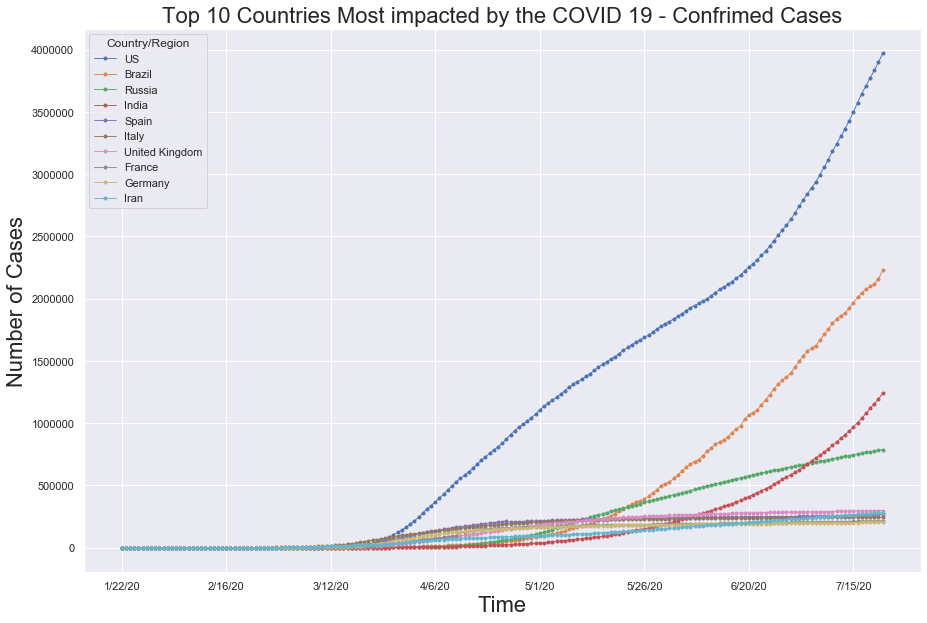

In [30]:
# Plot the Top 10 countries that has the most COVID 19 cases
confirmed_10.T.plot(figsize = (15, 10), linewidth=0.9, marker='.')
plt.title('Top 10 Countries Most impacted by the COVID 19 - Confrimed Cases', size = 22)
plt.xlabel('Time', size = 22)
plt.ylabel('Number of Cases', size = 22)
plt.show()

In [31]:
# Questions:
# How to Display the Month Name instaed of Number - dynamic, becasue it changes over time

# 1.2 US Covid 19 Data

In [32]:
US_confirmed = agg_confirmed[agg_confirmed['Country/Region'] == 'US']
US_death = agg_death[agg_death['Country/Region'] == 'US']
US_recovered = agg_recovered[agg_recovered['Country/Region'] == 'US']

In [33]:
# Transpose Data and drop the unnecessary rows
US_confirmed_t = US_confirmed.T.drop('Country/Region')
US_death_t = US_death.T.drop('Country/Region')
US_recovered_t = US_recovered.T.drop('Country/Region')

In [34]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

##  Checking lenght of the datasets

In [35]:
# Check lenght data points in the three dataset
def check_data_pooints(df1, df2, df3):
    if len(df1) == len(df2) == len(df3):
        print("Yes, data in the three datasets are for the same dates")
    else:
        print("No, data in the three datasets ARE NOTE for the same dates")

In [36]:
check_data_pooints(US_confirmed_t, US_death_t, US_recovered_t)

Yes, data in the three datasets are for the same dates


##  Comparing datapoints in each dataset

In [37]:
# Creating Numpy Arry for comaprison
c_index=np.array(list(US_confirmed_t.index))
d_index=np.array(list(US_death_t.index))
r_index = np.array(list(US_recovered_t.index))

In [38]:
# Zip function to returns data points that are not matching 
for i, j, k in zip(r_index,c_index, r_index):
    if i != j and i != k:
        print(i, j, k)
    else:
        pass
print('Data are for the same date - MATCHING')

Data are for the same date - MATCHING


In [39]:
# Further, match data with Numpy array equal function
np.array_equal(c_index, d_index) and np.array_equal(d_index, r_index)

True

##  Concate the three dataset

In [40]:
# concet the the three dataset if had the same data points
if np.array_equal(c_index, d_index) and np.array_equal(d_index, r_index):
    US_total = pd.concat([US_confirmed, US_death, US_recovered]).T.drop('Country/Region')

In [41]:
# Rename column and index
US_total.columns = ['confirmed', 'death', 'recovered']
US_total.index.name = 'Date'

In [42]:
US_total.head()

,confirmed,death,recovered
Date,,,
1/22/20,1,0,0
1/23/20,1,0,0
1/24/20,2,0,0
1/25/20,2,0,0
1/26/20,5,0,0


In [43]:
# Date is the index - convert it to date and time formate
US_total.index = pd.to_datetime(US_total.index)

In [44]:
US_total.head()

,confirmed,death,recovered
Date,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0


In [45]:
US_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-01-22 to 2020-07-22
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   confirmed  183 non-null    object
 1   death      183 non-null    object
 2   recovered  183 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


# 2. Stock Market Data

In [46]:
import yfinance as yf
import pandas_datareader as dr
import datetime

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [47]:
# Defining endpoint time stamp for extracting data
end = datetime.datetime.now().strftime('%Y-%m-%d')

In [48]:
# SMP 500 data  from Yahoo Finance
smp500 = dr.get_data_yahoo("SNP", start="2020-01-22", end= end)

In [49]:
smp500.shape

(128, 6)

In [50]:
smp500.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [51]:
# checking the first five rows of dataset
smp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-22,58.970001,58.02,58.950001,58.180000,169600.0,54.887253
2020-01-23,57.980000,57.02,57.599998,57.770000,227900.0,54.500458
2020-01-24,57.799999,56.84,57.730000,57.160000,146200.0,53.924980
2020-01-27,55.689999,54.82,55.139999,55.279999,230600.0,52.151379
2020-01-28,56.090000,55.16,55.490002,55.500000,174400.0,52.358929


In [52]:
smp500.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-03', '2020-02-04',
               ...
               '2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15',
               '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23'],
              dtype='datetime64[ns]', name='Date', length=128, freq=None)

# 3. Merge COVID 19 and Stock Market prices data 

In [53]:
# SElecting Covid 19 data based on the stock market frequency
US_covid = US_total[US_total.index.isin(smp500.index)]

In [54]:
US_covid.head()

,confirmed,death,recovered
Date,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-27,5,0,0
2020-01-28,5,0,0


In [55]:
US_covid.isnull().sum()

confirmed    0
death        0
recovered    0
dtype: int64

In [56]:
US_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-01-22 to 2020-07-22
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   confirmed  127 non-null    object
 1   death      127 non-null    object
 2   recovered  127 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


## Match the data points in the COVID 19 and Stock Market Data 

## 3.2 Merge the COVID 19 and Stock Market data 

In [57]:
US_stock_covid_df = pd.concat([US_covid, smp500], axis = 1).dropna()

In [58]:
US_stock_covid_df.head()

,confirmed,death,recovered,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,,
2020-01-22,1,0,0,58.970001,58.02,58.950001,58.180000,169600.0,54.887253
2020-01-23,1,0,0,57.980000,57.02,57.599998,57.770000,227900.0,54.500458
2020-01-24,2,0,0,57.799999,56.84,57.730000,57.160000,146200.0,53.924980
2020-01-27,5,0,0,55.689999,54.82,55.139999,55.279999,230600.0,52.151379
2020-01-28,5,0,0,56.090000,55.16,55.490002,55.500000,174400.0,52.358929


In [59]:
# First 5 rows of the combined datasets
US_stock_covid_df.isnull().sum()

confirmed    0
death        0
recovered    0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

## 3. 3 Exploring the merged dataset

In [60]:
US_stock_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-01-22 to 2020-07-22
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   confirmed  127 non-null    object 
 1   death      127 non-null    object 
 2   recovered  127 non-null    object 
 3   High       127 non-null    float64
 4   Low        127 non-null    float64
 5   Open       127 non-null    float64
 6   Close      127 non-null    float64
 7   Volume     127 non-null    float64
 8   Adj Close  127 non-null    float64
dtypes: float64(6), object(3)
memory usage: 9.9+ KB


In [61]:
# Check the duplicate
US_stock_covid_df.duplicated().sum()

0

# Export Merge Dataset - Save file to CSV for Explortort Data Analyses

In [62]:
US_stock_covid_df.to_csv(r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Capstone Project 2\\Data\US_stock_covid_df.csv')